### Import libraries

In [1]:
import numpy as np
import pickle

In [2]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8, 4]

### Load data in batches

Batch 1 & 2

In [3]:
batch1 = pickle.load(open(r'./data/batch1.pkl', 'rb'))
#remove batteries that do not reach 80% capacity
del batch1['b1c8']
del batch1['b1c10']
del batch1['b1c12']
del batch1['b1c13']
del batch1['b1c22']

In [4]:
batch2 = pickle.load(open(r'./data/batch2.pkl','rb'))

In [5]:
# There are four cells from batch1 that carried into batch2, we'll remove the data from batch2
# and put it with the correct cell from batch1
batch2_keys = ['b2c7', 'b2c8', 'b2c9', 'b2c15', 'b2c16']
batch1_keys = ['b1c0', 'b1c1', 'b1c2', 'b1c3', 'b1c4']
add_len = [662, 981, 1060, 208, 482];

In [6]:
for i, bk in enumerate(batch1_keys):
    batch1[bk]['cycle_life'] = batch1[bk]['cycle_life'] + add_len[i]
    for j in batch1[bk]['summary'].keys():
        if j == 'cycle':
            batch1[bk]['summary'][j] = np.hstack((batch1[bk]['summary'][j], batch2[batch2_keys[i]]['summary'][j] + len(batch1[bk]['summary'][j])))
        else:
            batch1[bk]['summary'][j] = np.hstack((batch1[bk]['summary'][j], batch2[batch2_keys[i]]['summary'][j]))
    last_cycle = len(batch1[bk]['cycles'].keys())
    for j, jk in enumerate(batch2[batch2_keys[i]]['cycles'].keys()):
        batch1[bk]['cycles'][str(last_cycle + j)] = batch2[batch2_keys[i]]['cycles'][jk]

In [7]:
del batch2['b2c7']
del batch2['b2c8']
del batch2['b2c9']
del batch2['b2c15']
del batch2['b2c16']

Batch 3

In [8]:
batch3 = pickle.load(open(r'./data/batch3.pkl','rb'))
# remove noisy channels from batch3
del batch3['b3c37']
del batch3['b3c2']
del batch3['b3c23']
del batch3['b3c32']
del batch3['b3c42']
del batch3['b3c43']

Join data

In [9]:
numBat1 = len(batch1.keys())
numBat2 = len(batch2.keys())
numBat3 = len(batch3.keys())
numBat = numBat1 + numBat2 + numBat3
print('Batch1: {}, Batch2: {}, Batch3: {}'.format(numBat1, numBat2, numBat3))

Batch1: 41, Batch2: 43, Batch3: 40


In [10]:
bat_dict = {**batch1, **batch2, **batch3}

### Data exploration

#### Basic exploration

In [128]:
plt.rcParams.update({'font.size': 18})
plt.rcParams['figure.figsize'] = [8, 5]

In [129]:
bat_dict.keys()

dict_keys(['b1c0', 'b1c1', 'b1c2', 'b1c3', 'b1c4', 'b1c5', 'b1c6', 'b1c7', 'b1c9', 'b1c11', 'b1c14', 'b1c15', 'b1c16', 'b1c17', 'b1c18', 'b1c19', 'b1c20', 'b1c21', 'b1c23', 'b1c24', 'b1c25', 'b1c26', 'b1c27', 'b1c28', 'b1c29', 'b1c30', 'b1c31', 'b1c32', 'b1c33', 'b1c34', 'b1c35', 'b1c36', 'b1c37', 'b1c38', 'b1c39', 'b1c40', 'b1c41', 'b1c42', 'b1c43', 'b1c44', 'b1c45', 'b2c0', 'b2c1', 'b2c2', 'b2c3', 'b2c4', 'b2c5', 'b2c6', 'b2c10', 'b2c11', 'b2c12', 'b2c13', 'b2c14', 'b2c17', 'b2c18', 'b2c19', 'b2c20', 'b2c21', 'b2c22', 'b2c23', 'b2c24', 'b2c25', 'b2c26', 'b2c27', 'b2c28', 'b2c29', 'b2c30', 'b2c31', 'b2c32', 'b2c33', 'b2c34', 'b2c35', 'b2c36', 'b2c37', 'b2c38', 'b2c39', 'b2c40', 'b2c41', 'b2c42', 'b2c43', 'b2c44', 'b2c45', 'b2c46', 'b2c47', 'b3c0', 'b3c1', 'b3c3', 'b3c4', 'b3c5', 'b3c6', 'b3c7', 'b3c8', 'b3c9', 'b3c10', 'b3c11', 'b3c12', 'b3c13', 'b3c14', 'b3c15', 'b3c16', 'b3c17', 'b3c18', 'b3c19', 'b3c20', 'b3c21', 'b3c22', 'b3c24', 'b3c25', 'b3c26', 'b3c27', 'b3c28', 'b3c29', 'b3c30

In [130]:
bat_dict['b1c0'].keys()

dict_keys(['cycle_life', 'charge_policy', 'summary', 'cycles'])

In [131]:
bat_dict['b1c0']['summary'].keys()

dict_keys(['IR', 'QC', 'QD', 'Tavg', 'Tmin', 'Tmax', 'chargetime', 'cycle'])

In [132]:
bat_dict['b1c0']['cycles']['0']

{'I': array([0, 0], dtype=uint64),
 'Qc': array([0, 0], dtype=uint64),
 'Qd': array([0, 0], dtype=uint64),
 'Qdlin': array([0, 0], dtype=uint64),
 'T': array([0, 0], dtype=uint64),
 'Tdlin': array([0, 0], dtype=uint64),
 'V': array([0, 0], dtype=uint64),
 'dQdV': array([0, 0], dtype=uint64),
 't': array([0, 0], dtype=uint64)}

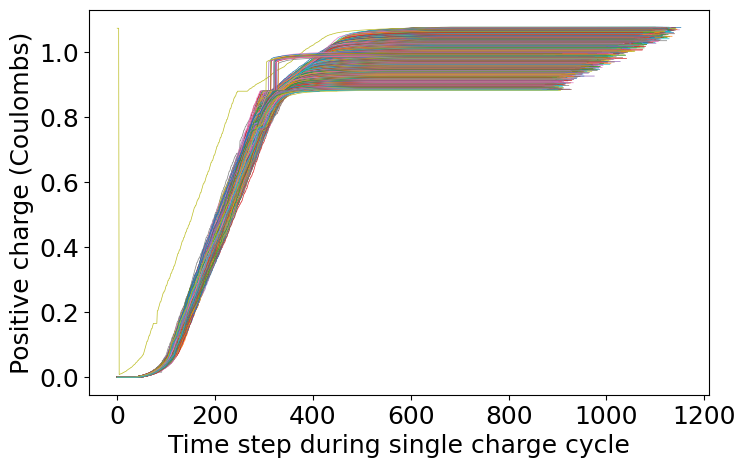

In [133]:
# plt.plot(bat_dict['b1c0']['cycles']['2']['Qc'])
for i in bat_dict['b1c0']['cycles'].keys():
    if max(bat_dict['b1c0']['cycles'][i]['Qc']) < 1.2:
        plt.plot(bat_dict['b1c0']['cycles'][i]['Qc'], linewidth=0.5)
# plt.title('Qc profile for all cycles of battery cell b1c0')
plt.xlabel('Time step during single charge cycle')
plt.ylabel('Positive charge (Coulombs)')
plt.savefig('figs/b1c0_qc_intracycle.png')

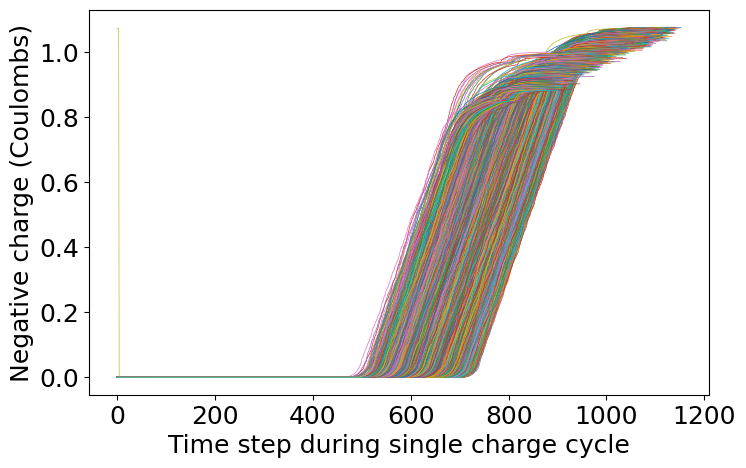

In [134]:
# plt.plot(bat_dict['b1c0']['cycles']['2']['Qd'])
for i in bat_dict['b1c0']['cycles'].keys():
    if max(bat_dict['b1c0']['cycles'][i]['Qd']) < 1.2:
        plt.plot(bat_dict['b1c0']['cycles'][i]['Qd'], linewidth=0.5)
# plt.title('Qd profile for all cycles of battery cell b1c0')
plt.xlabel('Time step during single charge cycle')
plt.ylabel('Negative charge (Coulombs)')
plt.savefig('figs/b1c0_qd_intracycle.png')

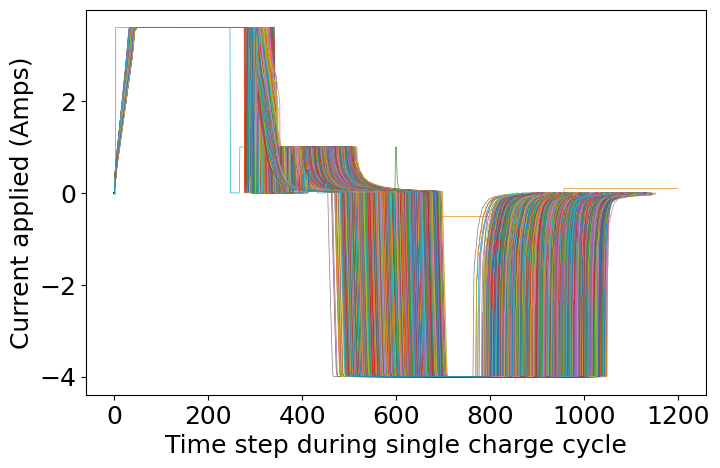

In [135]:
# plt.plot(bat_dict['b1c0']['cycles']['2']['I'])
for i in bat_dict['b1c0']['cycles'].keys():
    plt.plot(bat_dict['b1c0']['cycles'][i]['I'][:1200], linewidth=0.5)
# plt.title('I profile for all cycles of battery cell b1c0')
plt.xlabel('Time step during single charge cycle')
plt.ylabel('Current applied (Amps)')
plt.savefig('figs/b1c0_iapp_intracycle.png')

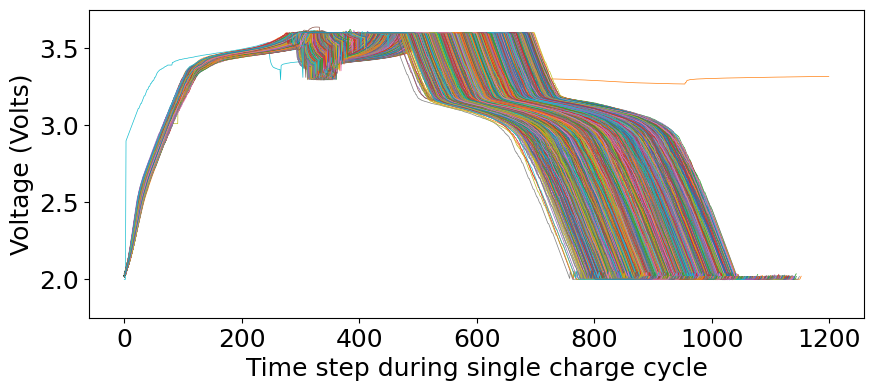

In [97]:
# plt.plot(bat_dict['b1c0']['cycles']['2']['V'])
for i in bat_dict['b1c0']['cycles'].keys():
    plt.plot(bat_dict['b1c0']['cycles'][i]['V'][:1200], linewidth=0.5)
# plt.title('V profile for all cycles of battery cell b1c0')
plt.xlabel('Time step during single charge cycle')
plt.ylabel('Voltage (Volts)')
plt.ylim((1.75,3.75))
plt.savefig('figs/b1c0_voltage_intracycle.png')

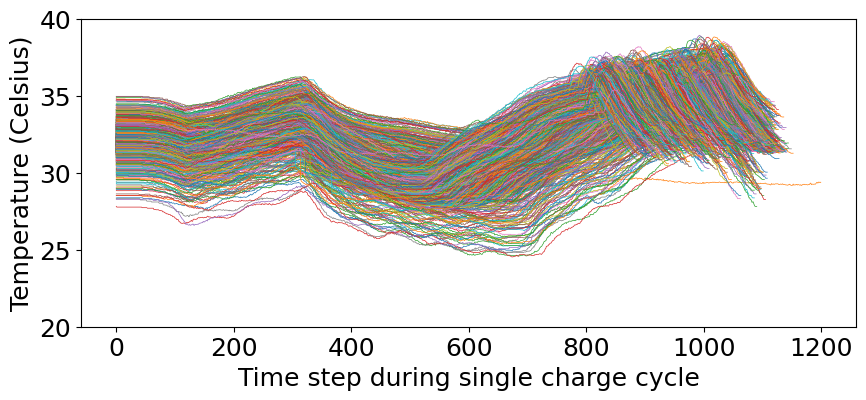

In [98]:
# plt.plot(bat_dict['b1c0']['cycles']['2']['T'])
for i in bat_dict['b1c0']['cycles'].keys():
    plt.plot(bat_dict['b1c0']['cycles'][i]['T'][:1200], linewidth=0.5)
# plt.title('T profile for all cycles of battery cell b1c0')
plt.xlabel('Time step during single charge cycle')
plt.ylabel('Temperature (Celsius)')
plt.ylim((20, 40))
plt.savefig('figs/b1c0_temp_intracycle.png')

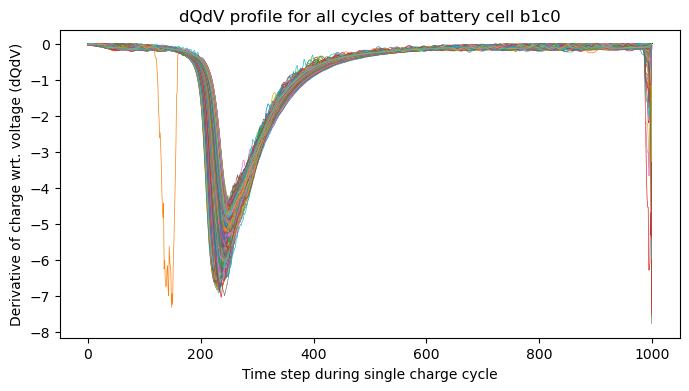

In [22]:
# plt.plot(bat_dict['b1c0']['cycles']['2']['dQdV'])
for i in bat_dict['b1c0']['cycles'].keys():
    if min(bat_dict['b1c0']['cycles'][i]['dQdV'][:1200]) > -8:
        plt.plot(bat_dict['b1c0']['cycles'][i]['dQdV'][:1200], linewidth=0.5)
plt.title('dQdV profile for all cycles of battery cell b1c0')
plt.xlabel('Time step during single charge cycle')
plt.ylabel('Derivative of charge wrt. voltage (dQdV)')
plt.savefig('figs/b1c0_dQdV_intracycle.png')

Proposed cleaning steps given basic explorative plots

In [72]:
bat_dict['b1c0']['summary']['QD']

array([0.        , 1.0706892 , 1.0719005 , ..., 0.88462406, 0.88433141,
       0.88280821])

In [71]:
max(bat_dict['b1c0']['cycles']['1']['Qd'])

1.0706892

#### Plot 1: discharge capacity vs. cycle number

In [116]:
plt.rcParams.update({'font.size': 12})

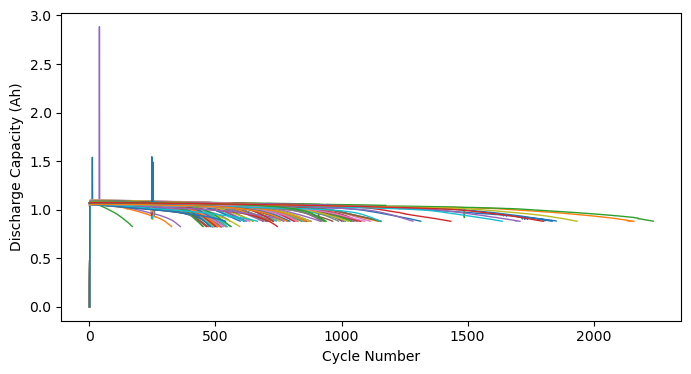

In [23]:
for i in bat_dict.keys():
    plt.plot(bat_dict[i]['summary']['cycle'], bat_dict[i]['summary']['QD'], linewidth=1)
plt.xlabel('Cycle Number')
plt.ylabel('Discharge Capacity (Ah)')
plt.savefig('figs/discharge_capacity_by_cycle.png')

Remove outliers which we expect reflect measurement error. Discharge capacity above 1.3 and below 0.8.

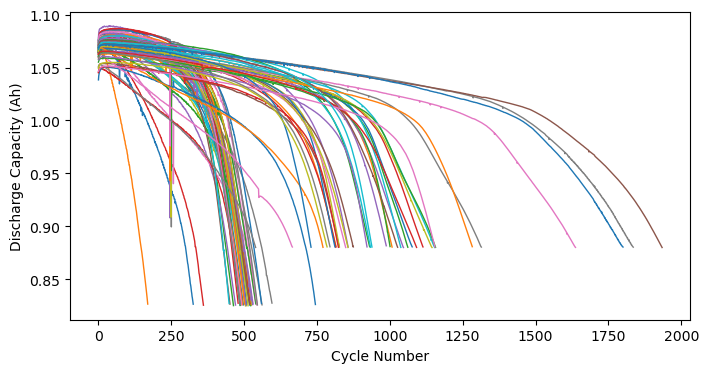

In [24]:
for i in bat_dict.keys():
    if max(bat_dict[i]['summary']['QD']) < 1.3 and min(bat_dict[i]['summary']['QD']) > 0.8:
        plt.plot(bat_dict[i]['summary']['cycle'], bat_dict[i]['summary']['QD'], linewidth=1)
plt.xlabel('Cycle Number')
plt.ylabel('Discharge Capacity (Ah)')
plt.savefig('figs/discharge_capacity_by_cycle_remove_outliers.png')

Notice two distinct 80% thresholds! One for batteries with nominal capacity of 1.1 Ah (0.88), and another for nominal capcity of 1.05 Ah (0.84). Note: battery capacity will not necessarily start at mfg rated nominal value for time step 0. Starting points in the above chart appear continuously distributed between 1.05 and 1.1.

#### Plot 2: Histogram of cycle life for train, validate, test

median: 736.5
mean: 801.6370967741935


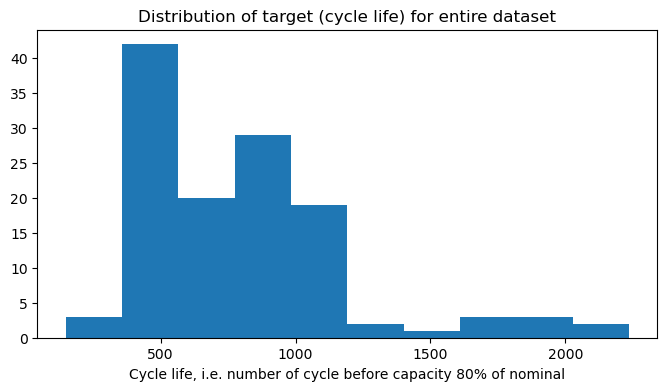

In [25]:
cycle_life_data = []
for i in bat_dict.keys():
    cycle_life_data.append(bat_dict[i]['cycle_life'][0][0])
print('median: {}'.format(np.median(cycle_life_data)))
print('mean: {}'.format(np.mean(cycle_life_data)))

plt.hist(np.array(cycle_life_data))
plt.title('Distribution of target (cycle life) for entire dataset')
plt.xlabel('Cycle life, i.e. number of cycle before capacity 80% of nominal')
plt.savefig('figs/histogram_cycle_life_fulldata.png')

Interestingly the distribution is skewed left, which median 65 cycles shorter than the mean. We will want to ensure our train, validation and test datasets are representative.

In [26]:
test_ind = np.hstack((np.arange(0,(numBat1+numBat2),2),83))
train_ind = np.arange(1,(numBat1+numBat2-1),2)
valid_ind = np.arange(numBat-numBat3,numBat);

medians: train 527.0, valid 964.5, test 561.0
means: train 673.7560975609756, valid 1032.0, test 709.2790697674419


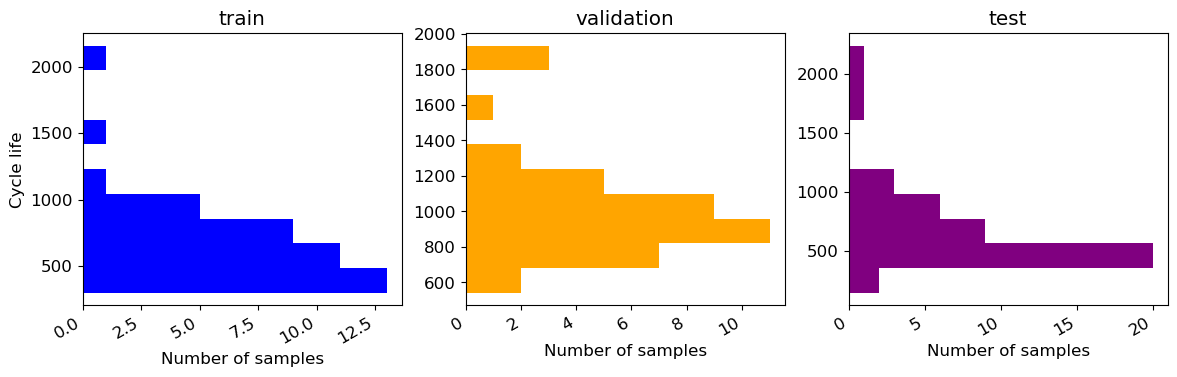

In [119]:
cycle_life_test_data = []
cycle_life_valid_data = []
cycle_life_train_data = []

count = 0
for i in bat_dict.keys():
    if count in test_ind:
        cycle_life_test_data.append(bat_dict[i]['cycle_life'][0][0])
    elif count in valid_ind:
        cycle_life_valid_data.append(bat_dict[i]['cycle_life'][0][0])
    else:
        cycle_life_train_data.append(bat_dict[i]['cycle_life'][0][0])
    count += 1
    
print('medians: train {}, valid {}, test {}'.format(
    np.median(cycle_life_train_data),
    np.median(cycle_life_valid_data),
    np.median(cycle_life_test_data)
))
print('means: train {}, valid {}, test {}'.format(
    np.mean(cycle_life_train_data),
    np.mean(cycle_life_valid_data),
    np.mean(cycle_life_test_data)
))

plt.rcParams['figure.figsize'] = [14, 4]
fig, (ax1, ax2, ax3) = plt.subplots(1,3)
# fig.suptitle('Distribution of target for train, valid, test')
ax1.hist(np.array(cycle_life_train_data), color='blue', orientation='horizontal')
ax2.hist(np.array(cycle_life_valid_data), color='orange', orientation='horizontal')
ax3.hist(np.array(cycle_life_test_data), color='purple', orientation='horizontal')
ax1.set_title('train'); ax2.set_title('validation'); ax3.set_title('test');
ax1.set(ylabel='Cycle life', xlabel='Number of samples')
ax2.set(xlabel='Number of samples'); ax3.set(xlabel='Number of samples')
fig.autofmt_xdate()
plt.savefig('figs/histogram_cycle_life_traintest.png')

We have chosen training, validation and test sets that retain similar distributions to our population as a whole. This should improve the robustness of the learned model weights and parameters.

#### Plot 3: Temperature vs. cycle number

In [26]:
bat_dict['b1c0']['summary'].keys()

dict_keys(['IR', 'QC', 'QD', 'Tavg', 'Tmin', 'Tmax', 'chargetime', 'cycle'])

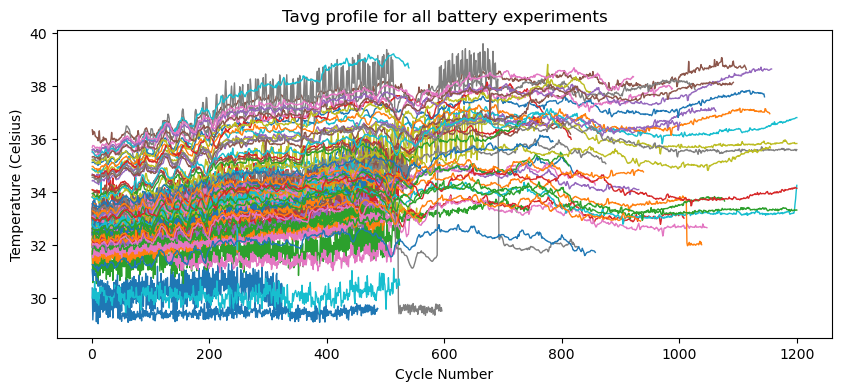

In [29]:
for i in bat_dict.keys():
    if min(bat_dict[i]['summary']['Tavg']) > 20:
        plt.plot(bat_dict[i]['summary']['cycle'][:1200], bat_dict[i]['summary']['Tavg'][:1200], linewidth=1)
plt.title('Tavg profile for all battery experiments')
plt.xlabel('Cycle Number')
plt.ylabel('Temperature (Celsius)')
plt.savefig('figs/Tavg_by_cycle.png')

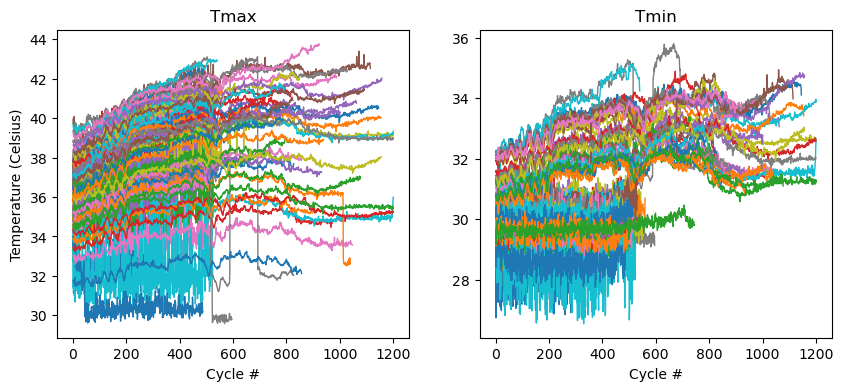

In [30]:
fig, (ax1, ax2) = plt.subplots(1,2)
for i in bat_dict.keys():
    if min(bat_dict[i]['summary']['Tavg']) > 20:
        ax1.plot(bat_dict[i]['summary']['cycle'][:1200], bat_dict[i]['summary']['Tmax'][:1200], linewidth=1)
        ax2.plot(bat_dict[i]['summary']['cycle'][:1200], bat_dict[i]['summary']['Tmin'][:1200], linewidth=1)

ax1.set_title('Tmax'); ax2.set_title('Tmin')
ax1.set(xlabel='Cycle #', ylabel='Temperature (Celsius)'); ax2.set(xlabel='Cycle #')
plt.savefig('figs/Tmax_Tmin_by_cycle.png')

Some outliers to remove (eg. Tavg < 20C). Variation may provide useful predictive information.

#### Plot 4: Cycle life vs. cycle number @ 5% capacity fade 

In [138]:
plt.rcParams['figure.figsize'] = [10, 4]
plt.rcParams.update({'font.size': 14})

In [139]:
cycle_life_arr = []
cycle_5pct_fade_arr = []
discharge_100cycles_arr = []

for i in bat_dict.keys():
    nominal = bat_dict[i]['summary']['QD'][1]
    cycle_life = bat_dict[i]['cycle_life'][0][0]
    
    if np.log(cycle_life) > 5.1:
        cycle_life_arr.append(cycle_life)
        discharge_100cycles_arr.append(bat_dict[i]['summary']['QD'][100]-nominal)
    
        for j in range(1,len(bat_dict[i]['summary']['QD'])):
            if bat_dict[i]['summary']['QD'][j] < 0.95*nominal:
                cycle_5pct_fade_arr.append(bat_dict[i]['summary']['cycle'][j])
                break

Correlation coefficient: [[1.         0.94042822]
 [0.94042822 1.        ]]


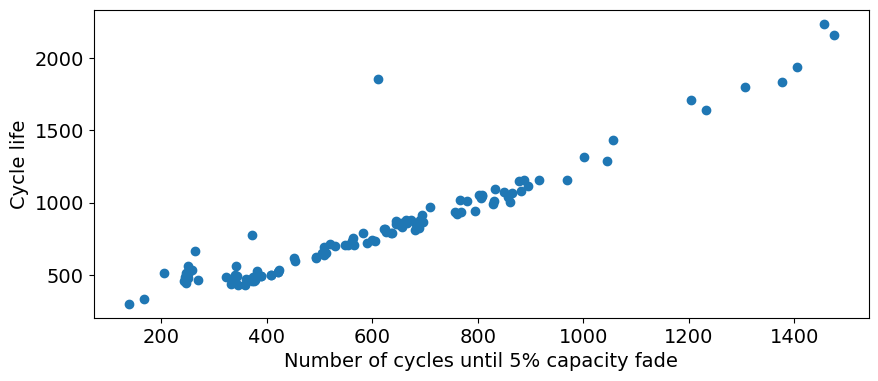

In [140]:
print('Correlation coefficient: {}'.format(np.corrcoef(cycle_5pct_fade_arr, cycle_life_arr)))
plt.scatter(cycle_5pct_fade_arr, cycle_life_arr)
# plt.title('Correlation between log cycle life and # cycles to reach 5% capacity fade')
plt.xlabel('Number of cycles until 5% capacity fade')
plt.ylabel('Cycle life')
plt.savefig('figs/correlation_cycle_life_vs_5pct_fade.png')

Strong correlation suggests that we are able to learn a lot about the cycle life from the beginning of the battery discharge capacity profile. This is promising since our method relies on extrapolation based on information from early cycles.

Correlation coefficient: [[1.         0.21200333]
 [0.21200333 1.        ]]


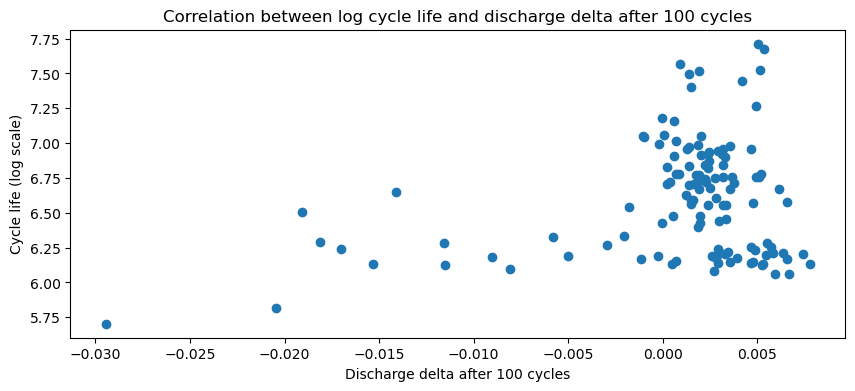

In [50]:
print('Correlation coefficient: {}'.format(np.corrcoef(discharge_100cycles_arr, cycle_life_arr)))
plt.scatter(discharge_100cycles_arr, np.log(cycle_life_arr))
plt.title('Correlation between log cycle life and discharge delta after 100 cycles')
plt.xlabel('Discharge delta after 100 cycles')
plt.ylabel('Cycle life (log scale)')
plt.savefig('correlation_cycle_life_discharge_delta_100cycles.png')

However, minimal relationship evident from looking solely at discharge delta over the first 100 cycles. This is what makes are problem a challenge.